In [23]:
#%config IPCompleter.greedy=True

In [24]:
from PIL import Image
import os
from glob import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import keras as kr
from sklearn.preprocessing import StandardScaler

In [34]:
#데이터 불러오기 


image_dir_path = os.path.dirname(os.path.abspath("__file__")) + '/Data(224)'
categories = os.listdir('./Data(224)')
select_cat = []
nb_classes = 0

# image_w = 28
# image_h = 28


X = []
y = []
#이미지 몇개 이상 분포만 불러오는 부분
count = 0;
for idx, c in enumerate(categories):
    dir = image_dir_path + '/' + c
    f = glob(dir+'/*.jpg')
    if len(f) >= 200:
        nb_classes += 1
        select_cat.append(dir)
# for images in files:
#     io.imshow(images)
#     #io.show()

# img_data=[]
# img = io.imread(files[1:3])
# img

#data = img.reshape(-1,224*224*3)/255
# img = io.imread(images[:1])
# data = img.reshape(-1,224*224*3)/255


In [35]:
#이미지 데이터 불러오고 라벨링
for index, cat in enumerate(select_cat):
    files = glob(select_cat[index]+'/*.jpg')
    for i, f in enumerate(files):
            img = Image.open(f)
            img = img.convert("L")
            #img = img.resize((image_w, image_h))
            data = np.asarray(img)
            
            X.append(data)
            y.append(index)

In [36]:
X = np.array(X)
y = np.array(y)

# X = X.reshape(-1,224*224*3)/255
# print(X.shape)

nsamples, nx, ny = X.shape
X = X.reshape((nsamples,nx*ny))
# print(X.shape)
# print(X.shape)
# print(y.shape)


In [40]:
#데이터 스플릿

#test 20% split
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size = 0.4)
x_test, x_val, y_test, y_val = train_test_split(X_test, Y_test, test_size = 0.5)

# X_train, X_test, y_trian, y_test = trian_test_split(X,y,test_size=0.2)
# x_test, x_val, y_test, y_val = train_test_split(X_train, y_train, test_size = 0.25)
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
x_test_std = sc.transform(x_test)
x_val_std = sc.transform(x_val)

print(X_train_std.shape, y_train.shape)
print(x_test_std.shape, y_test.shape)
print(x_val_std.shape, y_val.shape)


(2127, 50176) (2127,)
(709, 50176) (709,)
(710, 50176) (710,)


In [7]:
# #svm모델 생성
# from sklearn.svm import SVC
# svm_model = SVC(kernel='rbf', C = 20.0, gamma = 'auto')
# svm_model.fit(X_train_std, y_train)
# y_pred = svm_model.predict(x_val_std)

In [8]:
# print("prediction accuracy: {:.2f}%".format(np.mean(y_pred == y_val)))

In [9]:
from sklearn.svm import SVC
scores = []
for thisC in [*range(1,5)]:
    svc= SVC(kernel = 'linear', C=float(thisC))
    model=svc.fit(X_train_std, y_train)
    scoreTrain=model.score(X_train_std, y_train)
    scoreTest=model.score(x_val_std, y_val)
    print("선형 SVM : C : {}, training score:{:2f}, validation score:{:2f}".format
         (thisC, scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C : 1, training score:1.000000, validation score:0.533803
선형 SVM : C : 2, training score:1.000000, validation score:0.533803
선형 SVM : C : 3, training score:1.000000, validation score:0.533803
선형 SVM : C : 4, training score:1.000000, validation score:0.533803


<AxesSubplot:>

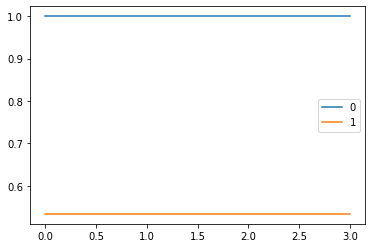

In [10]:
import pandas as pd
pd.DataFrame(scores).plot()
# <matplotlib.axes._subplots.AxesSubplot at 0x1cc9339dac8>

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel='linear', C=20).fit(X_train_std,y_train)
scores=cross_val_score(model, X_train_std, y_train, cv=5)
print("CV 점수: " +str(scores))
st_scores=cross_val_score(model, X_train_std, y_train,cv=StratifiedKFold(5,random_state=10, shuffle = True))
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 :  " +str(st_scores.mean()))

CV 점수: [0.53521127 0.54694836 0.54117647 0.52       0.49176471]
CV 평균점수 : 0.5270201601767467
StratifiedKFold CV 평균점수 :  0.5425617232808616


In [15]:
from sklearn.svm import LinearSVC

for thisC in [1,10,50,80,100]:  #[1,3,5,10,40,60,80,100]
    model2 = LinearSVC(C=thisC).fit(X_train_std, y_train)
    scoretrain = model2.score(X_train_std, y_train)
    scoreval = model2.score(x_val_std, y_val)
    print("선형 SVM : training score:{:2f}, validation score:{:2f} \n".format
         (thisC, scoretrain, scoreval))

선형 SVM : training score:1.000000, validation score:1.000000 

선형 SVM : training score:10.000000, validation score:1.000000 

선형 SVM : training score:50.000000, validation score:1.000000 

선형 SVM : training score:80.000000, validation score:1.000000 

선형 SVM : training score:100.000000, validation score:1.000000 



In [16]:
for thisGamma in [.1, .25, .5, 1]:
    for thisC in [1,20,70,100]: #[1,5,10,20,40,70,100] 
        model3=SVC(kernel="rbf", C=thisC,
                  gamma=thisGamma).fit(X_train_std, y_train)
        m3train=model3.score(X_train_std, y_train)
        m3val = model3.score(x_val_std, y_val)
        print("RBF SVM : C : {}, training score:{:2f}. validation score:{:2f} \n".format
             (thisC, thisGamma, m3train, m3val))

RBF SVM : C : 1, training score:0.100000. validation score:1.000000 

RBF SVM : C : 20, training score:0.100000. validation score:1.000000 

RBF SVM : C : 70, training score:0.100000. validation score:1.000000 

RBF SVM : C : 100, training score:0.100000. validation score:1.000000 

RBF SVM : C : 1, training score:0.250000. validation score:1.000000 

RBF SVM : C : 20, training score:0.250000. validation score:1.000000 

RBF SVM : C : 70, training score:0.250000. validation score:1.000000 

RBF SVM : C : 100, training score:0.250000. validation score:1.000000 

RBF SVM : C : 1, training score:0.500000. validation score:1.000000 

RBF SVM : C : 20, training score:0.500000. validation score:1.000000 

RBF SVM : C : 70, training score:0.500000. validation score:1.000000 

RBF SVM : C : 100, training score:0.500000. validation score:1.000000 

RBF SVM : C : 1, training score:1.000000. validation score:1.000000 

RBF SVM : C : 20, training score:1.000000. validation score:1.000000 

RBF SVM

In [17]:
# from sklearn.model_selection import GridSearchCV

# param={'C':[1,5,10,20,40,70,100], 'gamma':[.1,.25,.5,1]}
# GS=GridSearchCV(SVC(Kernel='rbf'),param,cv=5)
# GS.fit(X_train_std, y_train)
# print(GS.best_params_)
# print(GS.best_score_)

In [18]:
# model = SVC(kernel='rbf', C= , gamma= ).fit(x_test_std, y_test)


In [19]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train_std)
y_pred_test = svc.predict(x_test_std)


In [20]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       184
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       187
           5       1.00      1.00      1.00       153
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       143
           9       1.00      1.00      1.00       124
          10       1.00      1.00      1.00       116
          11       1.00      1.00      1.00       138
          12       1.00      1.00      1.00       164
          13       1.00      1.00      1.00       138

    accuracy                           1.00      2127
   macro avg       1.00      1.00      1.00      2127
weighted avg       1.00      1.00      1.00      2127



In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.74      0.69        80
           1       0.48      0.59      0.53        56
           2       0.53      0.69      0.60        35
           3       0.42      0.29      0.34        52
           4       0.78      0.72      0.75        74
           5       0.60      0.50      0.55        36
           6       0.53      0.63      0.58        49
           7       0.43      0.46      0.45        41
           8       0.60      0.86      0.70        50
           9       0.46      0.32      0.38        41
          10       0.47      0.35      0.40        48
          11       0.59      0.57      0.58        42
          12       0.54      0.47      0.50        58
          13       0.48      0.43      0.45        47

    accuracy                           0.56       709
   macro avg       0.54      0.54      0.54       709
weighted avg       0.55      0.56      0.55       709

